In [71]:
import pandas as pd
import datetime as dt
import seaborn as sns

In [146]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [16,8]
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [96]:
foo = r'C:\Users\User\Desktop\AirQO\AirQualityUpdate\jan2023/jan23.csv'
#foo =r"C:\Users\User\Desktop\AirQO\AirQualityUpdate\jan2023/JAN_22_23.csv"
#foo = r'C:\Users\User\Desktop\AirQO\AirQualityUpdate\jan2023/TestDEC_JAN 22_23.csv'

In [97]:
df_k= pd.read_csv(foo)
df_k["timestamp"] = df_k["timestamp"].str.replace('UTC','')
df_k['timestamp'] = pd.to_datetime(df_k['timestamp'], dayfirst=True)
df_k['day_name'] = df_k['timestamp'].dt.day_name()
df_k['day_of_week'] = df_k['timestamp'].dt.day_of_week
df_k['month'] = df_k['timestamp'].dt.month
df_k['month_name'] = df_k['timestamp'].dt.month_name()
df_k['year']= df_k['timestamp'].dt.year
df_k['Dates'] = df_k['timestamp'].dt.strftime('%Y-%m-%d')
df_k['Dates'] = pd.to_datetime(df_k['Dates'], dayfirst=True)
df_k['Day']=df_k["timestamp"].dt.day

# Droping nan values
df =df_k.dropna(subset=['pm2_5'])

In [93]:
#df.to_csv(r"C:\Users\User\Desktop\AirQO\AirQualityUpdate\jan2023/data.csv")
df.head()

,timestamp,site_name,site_name_1,site_latitude,site_longitude,site_altitude,pm2_5,pm10,temperature,humidity,...,country,district,region,day_name,day_of_week,month,month_name,year,Dates,Day
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,105.3000,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
1,2023-01-01,NaN,NaN,NaN,NaN,NaN,97.1000,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
2,2023-01-01,NaN,NaN,NaN,NaN,NaN,16.7539,32.322781,36.578537,34.046829,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
3,2023-01-01,NaN,NaN,NaN,NaN,NaN,22.6702,38.780760,37.282821,32.803590,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
4,2023-01-01,NaN,NaN,NaN,NaN,NaN,24.2527,38.660564,39.142222,30.166944,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1


In [99]:
print(df['Day' ].unique())
print(df['month' ].unique())
print(df['year' ].unique())
print(df["country"].unique())

[ 1 23 18 19 24 25 20 21 22  8  3  9  2 17  7 16  4  5  6 14 11 15 13 12
 10]
[1]
[2023]
[nan 'Kenya' 'Senegal' 'Uganda' 'Cameroon']


In [105]:
df[df['pm2_5'] > 500].count()

timestamp         38
site_name         24
site_name_1       24
site_latitude     24
site_longitude    24
site_altitude     24
pm2_5             38
pm10              24
temperature       24
humidity          24
wind_speed        24
wind_direction    24
country           24
district          24
region            24
day_name          38
day_of_week       38
month             38
month_name        38
year              38
Dates             38
Day               38
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222125 entries, 0 to 259185
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       222125 non-null  datetime64[ns]
 1   site_name       138210 non-null  object        
 2   site_name_1     138210 non-null  object        
 3   site_latitude   138210 non-null  float64       
 4   site_longitude  138210 non-null  float64       
 5   site_altitude   138210 non-null  float64       
 6   pm2_5           222125 non-null  float64       
 7   pm10            162640 non-null  float64       
 8   temperature     155775 non-null  float64       
 9   humidity        153654 non-null  float64       
 10  wind_speed      162669 non-null  float64       
 11  wind_direction  124274 non-null  float64       
 12  country         138210 non-null  object        
 13  district        131469 non-null  object        
 14  region          138210 non-null  obj

In [107]:
# create a boolean mask to identify values above 500
mask = df['pm2_5'] > 500

# drop the rows where the mask is True
df = df.drop(df[mask].index)

In [108]:
l1 = df['country']=='Uganda'
year2 = df['year']==2022
year3= df['year']==2023
#df_uganda =df[(l1)&(year2)]
df_uganda =df[(l1)]

In [113]:
df_uganda['Day'].nunique()

25

In [114]:
df_uganda['pm2_5'].mean()

47.684216218280866

In [195]:
df_u = df_uganda.groupby(["site_name"])["pm2_5","pm10","site_latitude","site_longitude","temperature"].mean().round(2)
df_u=df_u.reset_index().sort_values(by='pm2_5',ascending=False)
df_u.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_6648\3845481846.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_u = df_uganda.groupby(["site_name"])["pm2_5","pm10","site_latitude","site_longitude","temperature"].mean().round(2)


,site_name,pm2_5,pm10,site_latitude,site_longitude,temperature
28,Kawempe,112.99,139.56,0.35,32.56,21.89
21,"Kalerwe, Kawempe",97.47,123.06,0.36,32.57,22.50
52,"Makindye, Lukuli Makindye",84.04,99.44,0.29,32.59,21.61
79,"Rugarama Hill, Kabale",81.17,56.60,-1.25,29.99,17.30
67,"Najera, Kira Municipality",80.51,97.89,0.39,32.63,22.32
46,"Lorry Park, Fort Portal",78.11,99.75,0.66,30.27,23.22
12,"Central Ward, Mityana",75.38,84.61,0.40,32.04,21.31
32,"Kikungiri Hill, Kabale Municipality Kabale",73.30,82.95,-1.27,29.99,17.12
17,Gulu City Council,72.42,81.12,2.78,32.30,27.10
25,"Kasubi, Rubaga",71.98,87.67,0.34,32.55,22.54


In [194]:
df_u.tail(10)

,month,pm2_5,pm10,site_latitude,site_longitude,temperature
0,1,47.68,57.29,0.65,32.06,22.75


In [116]:
df.head()

,timestamp,site_name,site_name_1,site_latitude,site_longitude,site_altitude,pm2_5,pm10,temperature,humidity,...,country,district,region,day_name,day_of_week,month,month_name,year,Dates,Day
0,2023-01-01,NaN,NaN,NaN,NaN,NaN,105.3000,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
1,2023-01-01,NaN,NaN,NaN,NaN,NaN,97.1000,NaN,NaN,NaN,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
2,2023-01-01,NaN,NaN,NaN,NaN,NaN,16.7539,32.322781,36.578537,34.046829,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
3,2023-01-01,NaN,NaN,NaN,NaN,NaN,22.6702,38.780760,37.282821,32.803590,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1
4,2023-01-01,NaN,NaN,NaN,NaN,NaN,24.2527,38.660564,39.142222,30.166944,...,NaN,NaN,NaN,Sunday,6,1,January,2023,2023-01-01,1


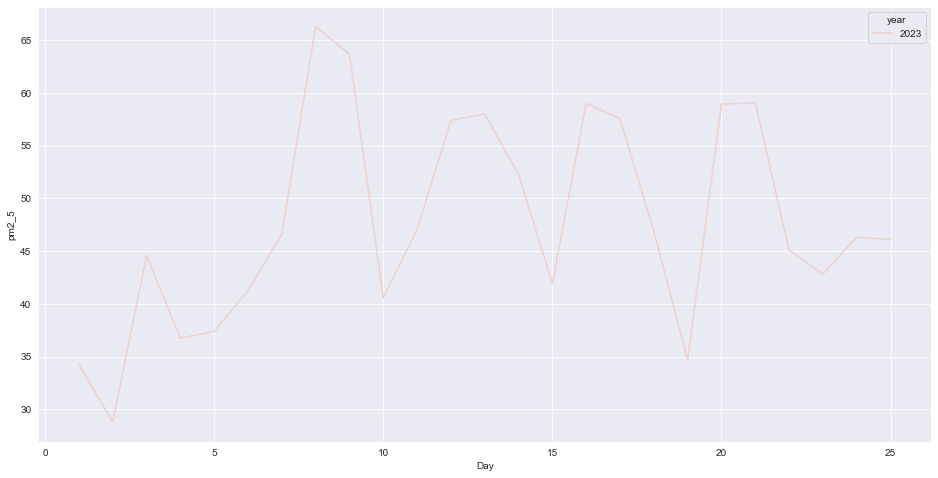

In [139]:
ax = sns.lineplot(x="Day", y="pm2_5",ci=None, hue='year', data=df_uganda ) 
plt.show()

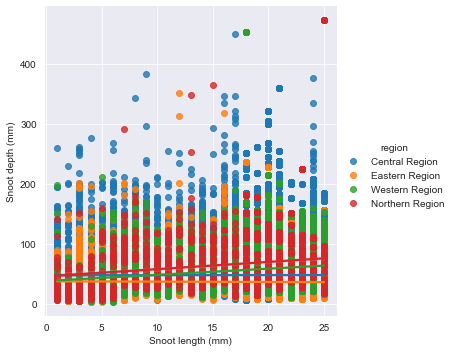

In [148]:
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=df_uganda,
    x="Day", y="pm2_5", hue="region",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")

In [121]:
df_district = df_uganda.groupby(["district"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_district=df_district.reset_index().sort_values(by='pm2_5',ascending=False)
df_district.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_6648\2554547055.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_district = df_uganda.groupby(["district"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,district,pm2_5,site_latitude,site_longitude
12,Mityana,75.38,0.40,32.04
2,Gulu,68.09,2.78,32.30
5,Kabale,66.36,-1.26,29.99
8,Kasese,60.44,0.18,30.08
3,Iganga,53.84,0.61,33.47
9,Kisoro,51.86,-1.28,29.70
6,Kabarole,51.77,0.65,30.27
7,Kampala,50.78,1.00,31.93
13,Mubende,43.85,0.55,31.40
18,Wakiso,41.58,0.33,32.59


In [185]:
df_region = df_uganda.groupby(["region"])["pm2_5","site_latitude","site_longitude"].mean().round(2)
df_region=df_region.reset_index().sort_values(by='pm2_5',ascending=False)
df_region.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_6648\372507932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_region = df_uganda.groupby(["region"])["pm2_5","site_latitude","site_longitude"].mean().round(2)


,region,pm2_5,site_latitude,site_longitude
2,Northern Region,68.09,2.78,32.30
3,Western Region,56.89,-0.27,30.15
0,Central Region,47.39,0.78,32.20
1,Eastern Region,35.98,0.67,33.37


In [123]:
l2 = df['country']!='Uganda'
df_out =df[l2 ]
# drop nan country
# Droping nan values
df_out =df_out.dropna(subset=['country'])
df_out

,timestamp,site_name,site_name_1,site_latitude,site_longitude,site_altitude,pm2_5,pm10,temperature,humidity,...,country,district,region,day_name,day_of_week,month,month_name,year,Dates,Day
57,2023-01-01 00:00:00,UNEP Collocation Site 1(BAM location) Nairobi,UNEP Collocation Site 1(BAM location) Nairobi,-1.239630,36.793760,1729.54,27.932500,31.257500,NaN,NaN,...,Kenya,NaN,Nairobi County,Sunday,6,1,January,2023,2023-01-01,1
58,2023-01-01 00:00:00,UNEP Collocation Site 1(BAM location) Nairobi,UNEP Collocation Site 1(BAM location) Nairobi,-1.239630,36.793760,1729.54,18.385700,29.187349,18.282308,67.084615,...,Kenya,NaN,Nairobi County,Sunday,6,1,January,2023,2023-01-01,1
59,2023-01-01 00:00:00,UNEP Collocation Site 1(BAM location) Nairobi,UNEP Collocation Site 1(BAM location) Nairobi,-1.239630,36.793760,1729.54,29.660875,33.665000,NaN,NaN,...,Kenya,NaN,Nairobi County,Sunday,6,1,January,2023,2023-01-01,1
64,2023-01-01 00:00:00,Dakar Senegal,Dakar Senegal,14.744487,-17.401958,7.84,33.939900,45.160912,25.591143,37.744857,...,Senegal,Pikine,Dakar Region,Sunday,6,1,January,2023,2023-01-01,1
24154,2023-01-18 01:00:00,UNEP Collocation Site 1(BAM location) Nairobi,UNEP Collocation Site 1(BAM location) Nairobi,-1.239630,36.793760,1729.54,20.512000,22.590000,NaN,NaN,...,Kenya,NaN,Nairobi County,Wednesday,2,1,January,2023,2023-01-18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236222,2023-01-14 16:00:00,Kisumu city hall,Kisumu city hall,-0.105224,34.754297,1179.86,13.357400,19.443678,26.164474,57.414211,...,Kenya,NaN,Kisumu County,Saturday,5,1,January,2023,2023-01-14,14
236223,2023-01-18 08:00:00,Kisumu city hall,Kisumu city hall,-0.105224,34.754297,1179.86,15.855200,27.920144,35.296857,22.790286,...,Kenya,NaN,Kisumu County,Wednesday,2,1,January,2023,2023-01-18,18
236224,2023-01-22 11:00:00,Kisumu city hall,Kisumu city hall,-0.105224,34.754297,1179.86,13.164400,16.570366,33.330833,37.031667,...,Kenya,NaN,Kisumu County,Sunday,6,1,January,2023,2023-01-22,22
236225,2023-01-06 18:00:00,Kisumu city hall,Kisumu city hall,-0.105224,34.754297,1179.86,31.939100,44.980339,26.352000,37.979143,...,Kenya,NaN,Kisumu County,Friday,4,1,January,2023,2023-01-06,6


In [124]:
df_o = df_out.groupby(["site_name"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)
df_o=df_o.reset_index().sort_values(by='pm2_5',ascending=False)
df_o.head(10)

C:\Users\User\AppData\Local\Temp\ipykernel_6648\2831790116.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_o = df_out.groupby(["site_name"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)


,site_name,pm2_5,pm10,site_latitude,site_longitude
6,University of Douala Cameroon,42.93,54.11,4.06,9.70
2,Kisumu city hall,25.62,33.52,-0.11,34.75
0,Dakar Senegal,22.22,24.40,14.74,-17.40
1,Kisumu Urban Project HQ (KUP),21.60,27.97,-0.12,34.75
5,US Mission Nairobi,21.35,23.18,-1.22,36.81
4,UNEP Collocation Site 2(UNEP Grounds) Nairobi,16.18,20.21,-1.24,36.81
3,UNEP Collocation Site 1(BAM location) Nairobi,13.96,15.48,-1.24,36.79


In [128]:
df_day=df.reset_index().groupby(pd.Grouper(key='timestamp', freq='D'))['pm2_5'].mean()
df_day.dropna()

timestamp
2023-01-01    38.718266
2023-01-02    34.134387
2023-01-03    45.025027
2023-01-04    38.873558
2023-01-05    38.631359
2023-01-06    43.009241
2023-01-07    43.882861
2023-01-08    52.770455
2023-01-09    51.929263
2023-01-10    39.970825
2023-01-11    43.890069
2023-01-12    49.697556
2023-01-13    47.861638
2023-01-14    42.315285
2023-01-15    36.383665
2023-01-16    46.272731
2023-01-17    48.791643
2023-01-18    41.623565
2023-01-19    33.732530
2023-01-20    50.350851
2023-01-21    52.706941
2023-01-22    43.207581
2023-01-23    42.655843
2023-01-24    44.460833
2023-01-25    43.522545
Freq: D, Name: pm2_5, dtype: float64

In [196]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm

df_i =df_u
longj =df_i['site_longitude'].mean()
latj = df_i['site_latitude'].mean()

 
# add marker one by one on the map
data=df_i


map = folium.Map(location=[latj,longj], tiles="OpenStreetMap", zoom_start=7)

#linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_u['pm2_5'].min(), vmax=df_u['pm2_5'].max())
linear = cm.StepColormap(["#44e527", "#f8fe39", "#ee8327","#fe0023","#8639c0","#81202e"],
                           vmin=0, vmax=1000, index=[0,12,35,55,150,250,1000]
                           )
for _, row in df_i.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.site_name,
                      radius=row.pm2_5/10,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.5,
                      fill_opacity=0.8
                      ).add_to(map)
 
# save
map.save(r'C:\Users\User\Desktop\AirQO\AirQualityUpdate\jan2023//Ugandai.html')

map


In [184]:
import pandas as pd
import numpy as np
import io
import folium
import branca.colormap as cm

# Droping nan values
df2 =df.dropna(subset=['country'])

df_A = df2.groupby(["country"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)
df_A=df_A.reset_index().sort_values(by='pm2_5',ascending=False)
 


df_i =df_A
longj =df_i['site_longitude'].mean()
latj = df_i['site_latitude'].mean()

 
# add marker one by one on the map
data=df_i


map = folium.Map(location=[latj,longj], tiles="OpenStreetMap", zoom_start=3)

#linear = cm.LinearColormap(["green", "yellow", "red"], vmin=df_u['pm2_5'].min(), vmax=df_u['pm2_5'].max())
linear = cm.StepColormap(["#44e527", "#f8fe39", "#ee8327","#fe0023","#8639c0","#81202e"],
                           vmin=0, vmax=1000, index=[0,12,35,55,150,250,1000]
                           )
for _, row in df_i.iterrows():
    folium.CircleMarker([row.site_latitude, row.site_longitude],
                      popup=row.country,
                      radius=row.pm2_5/3,
                      color = linear(row.pm2_5),                     
                      fill=True,
                      fill_color=linear(row.pm2_5),
                      opacity=0.9,
                      fill_opacity=0.9
                      ).add_to(map)
'''for i in range(0,len(data)):
   folium.Marker(
      location=[data.iloc[i]['site_latitude'], data.iloc[i]['site_longitude']],
      popup=data.iloc[i]['country'],
      icon=folium.DivIcon(html=f"""<div style="font-family: courier new; color: black ; font-size: 18px;">{data.iloc[i]['country']}</div>""")
   ).add_to(map) 
'''
# save
map.save(r'C:\Users\User\Desktop\AirQO\AirQualityUpdate\jan2023//Africa.html')

map


C:\Users\User\AppData\Local\Temp\ipykernel_6648\1028700562.py:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_A = df2.groupby(["country"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)


In [167]:
import folium
import pandas as pd

# read the data from the CSV file
df2 =df.dropna(subset=['country']) 
df_A = df2.groupby(["country"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)
df_A=df_A.reset_index().sort_values(by='pm2_5',ascending=False)
 

# create the base map
m = folium.Map(location=[df_A['site_latitude'].mean(), df_A['site_longitude'].mean()], zoom_start=5)

# define a function to create the markers
def create_marker(row):
    # create the marker
    marker = folium.CircleMarker(location=[row['site_latitude'], row['site_longitude']],
                                 radius=5,
                                 color='red',
                                 fill=True,
                                 fill_color='red')
    # add a tooltip with the AQI value
    tooltip = folium.Tooltip(text=str(row['pm2_5']))
    marker.add_child(tooltip)
    # add an arrow to the marker
    folium.Marker([row['site_latitude'], row['site_longitude']],icon=folium.Icon(color='red',icon='info-sign'),popup=row['country']).add_to(m)
    return marker

# create the markers for each row in the dataframe
df.apply(create_marker, axis=1)

# display the map
m



C:\Users\User\AppData\Local\Temp\ipykernel_6648\3320267167.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_A = df2.groupby(["country"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)


ValueError: Location values cannot contain NaNs.

In [190]:
df2 =df.dropna(subset=['country'])

df_A = df2.groupby(["country"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)
df_A=df_A.reset_index().sort_values(by='pm2_5',ascending=False)
df_A

C:\Users\User\AppData\Local\Temp\ipykernel_6648\3338982708.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_A = df2.groupby(["country"])["pm2_5","pm10","site_latitude","site_longitude"].mean().round(2)


,country,pm2_5,pm10,site_latitude,site_longitude
3,Uganda,47.68,57.29,0.65,32.06
0,Cameroon,42.93,54.11,4.06,9.70
2,Senegal,22.22,24.40,14.74,-17.40
1,Kenya,18.43,23.06,-0.90,36.20


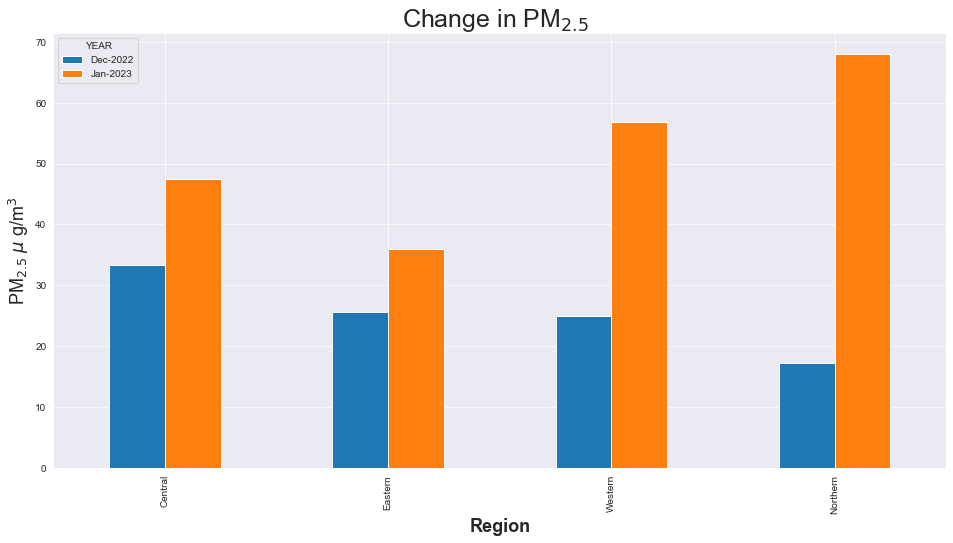

In [207]:
import pandas as pd

data = {'regions': ["Central", "Eastern", "Western", "Northern"],
        'Dec-2022': [33.28, 25.63, 25.01, 17.26],
        'Jan-2023': [47.39, 35.98, 56.89, 68.09]}

df_d = pd.DataFrame(data)
df_d
df_d.plot(x='regions', y=['Dec-2022', 'Jan-2023'], kind='bar')
plt.title('Change in PM$_{2.5}$  ',fontsize=25)
plt.ylabel("PM$_{2.5}$ $\mu$ g/m$^3$",fontsize=18)
plt.legend(title='YEAR', loc='upper left')
plt.xlabel('Region',fontsize=18,  fontweight='bold')
plt.show()

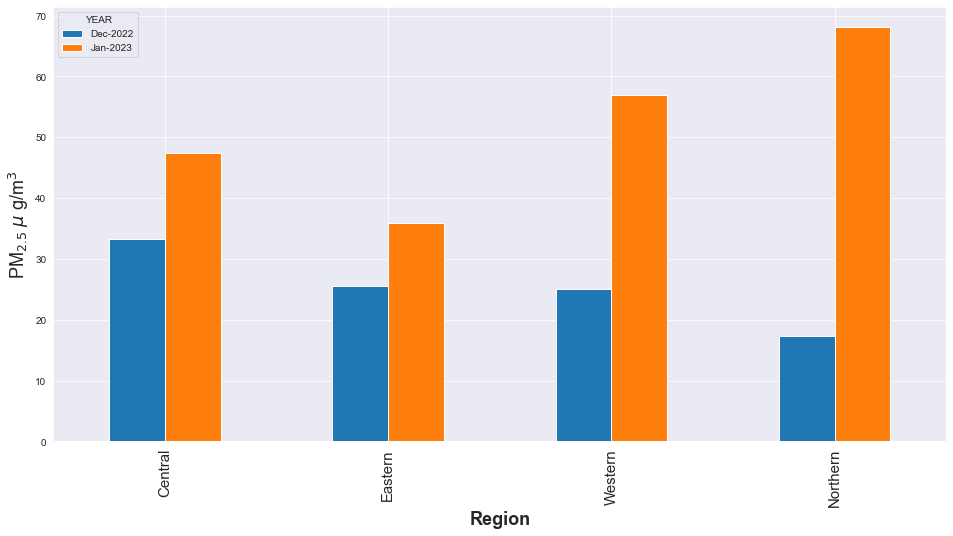

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
data = {'regions': ["Central", "Eastern", "Western", "Northern"],
        'Dec-2022': [33.28, 25.63, 25.01, 17.26],
        'Jan-2023': [47.39, 35.98, 56.89, 68.09],
        'site_latitude':[0.78,0.67,-0.27,2.78],
        'site_longitude':[32.20,33.37,30.15,32.30]
        }
df_d = pd.DataFrame(data)
df_d
ax = df_d.plot(x='regions', y=['Dec-2022', 'Jan-2023'], kind='bar')
for tick in ax.xaxis.get_ticklabels():
    tick.set_size(15)
#plt.title('Change in PM$_{2.5}$  ',fontsize=25)
plt.ylabel("PM$_{2.5}$ $\mu$ g/m$^3$",fontsize=18)
plt.legend(title='YEAR', loc='upper left')
plt.xlabel('Region',fontsize=18,  fontweight='bold')
plt.show()
